In [5]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [1]:
### https://drive.google.com/file/d/1YGxAXoHpMNe-Ou2OfdrCEvnVQQHVkxyS/view?usp=drive_link
system("gdown --id 1YGxAXoHpMNe-Ou2OfdrCEvnVQQHVkxyS")

In [2]:
system("ls",TRUE)

[1] "sample_data"       "titanic_train.csv"

In [6]:
DF <- fread("/content/titanic_train.csv") %>% as_tibble()

In [7]:
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

In [8]:
install.packages(c("tidtverse","Hmisc","caret","e1071","ipred","randomForest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidtverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘checkmate’, ‘htmlwidgets’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘diagram’, ‘lava’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘prodlim’




In [14]:
installing packages into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)

ERROR: ignored

In [13]:
library(repr)
options(repr.plot.width=10, repr.plot.height=7)

In [16]:
DF <- select(DF,-PassengerId,-Name,-Cabin,-Ticket) %>%
  mutate_at(c("Survived","Pclass","Sex","Embarked"),factor)

In [17]:
DF %>% str()
DF %>% show()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0 

In [18]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [19]:
DF$Age <- impute(DF$Age,median)  # mean, median, 특정숫자
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


In [21]:
library("caret")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [22]:
index <- caret::createDataPartition(y=DF$Survived,p=0.9,list=FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        3      female 26           0     0  7.92 S       
 3 1        1      female 35           1     0 53.1  S       
 4 0        3      male   35           0     0  8.05 S       
 5 0        3      male   28           0     0  8.46 Q       
 6 0        1      male   54           0     0 51.9  S       
 7 0        3      male    2           3     1 21.1  S       
 8 1        3      female 27           0     2 11.1  S       
 9 1        2      female 14           1     0 30.1  C       
10 1        1      female 58           0     0 26.6  S       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1        1      female 38           1     0 71.3  C       
 2 1        3

In [15]:
library(ipred)

In [28]:
set.seed(66)
model_bagging <- ipred::bagging(Survived ~.,data=train,nbagg=100)

In [29]:
#7
predict_value_bagging <- predict(model_bagging, test, type ='class') %>% tibble(predict_value_bagging=.)
head(predict_value_bagging)

predict_value_bagging
<fct>
1
1
0
0
0
0


In [32]:
library(dplyr)

In [34]:
#8
predict_check_bagging <- test %>% select(Survived) %>% dplyr::bind_cols(.,predict_value_bagging)
head(predict_check_bagging)

Survived,predict_value_bagging
<fct>,<fct>
1,1
1,1
0,0
0,0
0,0
0,0


In [35]:
#9
cm <- caret::confusionMatrix(predict_value_bagging$predict_value_bagging,test$Survived)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46  6
         1  8 28
                                          
               Accuracy : 0.8409          
                 95% CI : (0.7475, 0.9102)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 3.01e-06        
                                          
                  Kappa : 0.6681          
                                          
 Mcnemar's Test P-Value : 0.7893          
                                          
            Sensitivity : 0.8519          
            Specificity : 0.8235          
         Pos Pred Value : 0.8846          
         Neg Pred Value : 0.7778          
             Prevalence : 0.6136          
         Detection Rate : 0.5227          
   Detection Prevalence : 0.5909          
      Balanced Accuracy : 0.8377          
                                          
       'Positive' Class : 0               
                                    

In [36]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [41]:
#10
model_rf <- randomForest(Survived~.,data=train,na.action=na.omit,ntree=1000)
model_rf


Call:
 randomForest(formula = Survived ~ ., data = train, ntree = 1000,      na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.31%
Confusion matrix:
    0   1 class.error
0 452  43  0.08686869
1  96 212  0.31168831

In [42]:
predict_value_rf <- predict(model_rf,test,type='class') %>% tibble(predict_value_rf=.)
predict_value_rf

predict_value_rf
<fct>
1
1
0
0
0
0
0
0
0


In [43]:
#12
predict_check_rf <- test %>% select(Survived) %>% dplyr::bind_cols(.,predict_value_rf)
head(predict_check_rf)

Survived,predict_value_rf
<fct>,<fct>
1,1
1,1
0,0
0,0
0,0
0,0


In [45]:
#13
cm_rf <- caret::confusionMatrix(predict_value_rf$predict_value_rf,test$Survived)
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 47  7
         1  7 27
                                          
               Accuracy : 0.8409          
                 95% CI : (0.7475, 0.9102)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 3.01e-06        
                                          
                  Kappa : 0.6645          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8704          
            Specificity : 0.7941          
         Pos Pred Value : 0.8704          
         Neg Pred Value : 0.7941          
             Prevalence : 0.6136          
         Detection Rate : 0.5341          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.8322          
                                          
       'Positive' Class : 0               
                                    

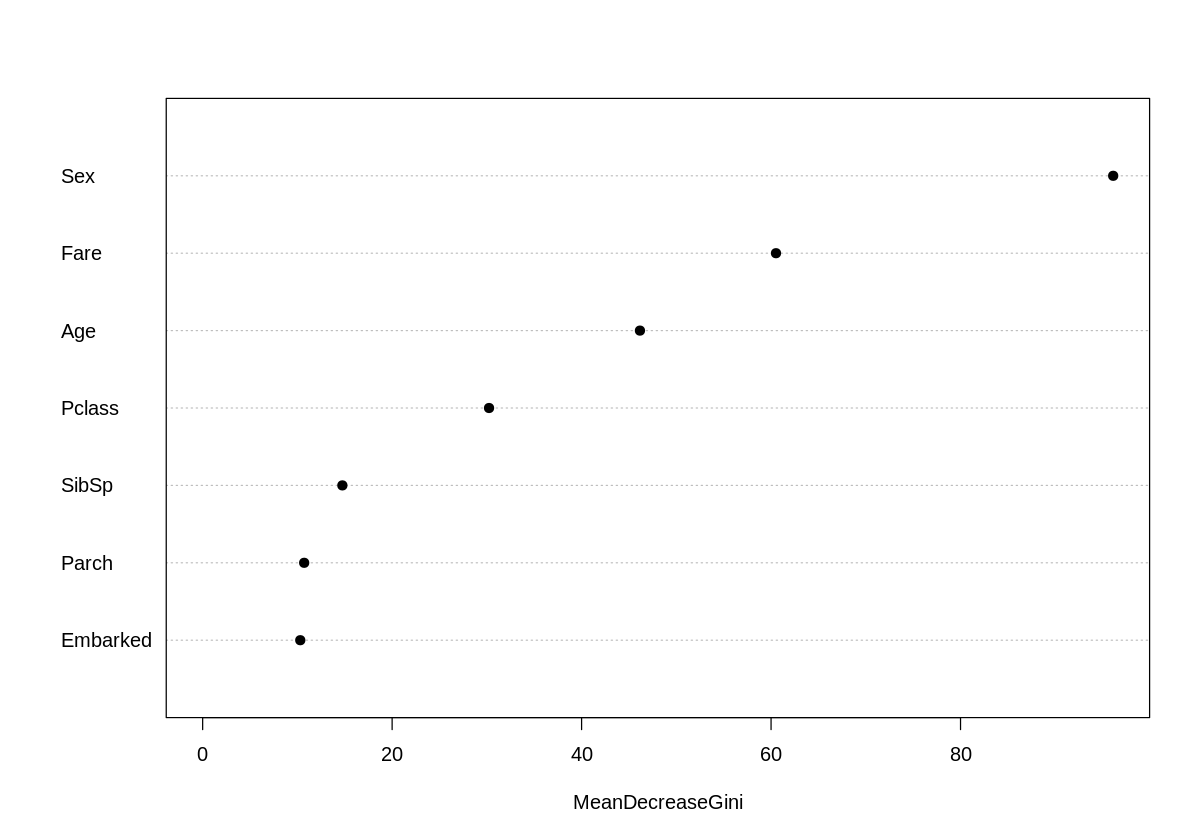

In [52]:
varImpPlot(model_rf,type=2,pch=19,col=1,cex=1,main="")